 # SyriaTel Customer Churn Analysis

In [218]:
<img src="images/syriaTellogo.jpg" width=400 height=400 />

SyntaxError: invalid syntax (Temp/ipykernel_11696/1945254084.py, line 1)

## Overview 

In [219]:
<img src="images/syriaTel.jpg" width=400 height=400 />

SyntaxError: invalid syntax (Temp/ipykernel_11696/3755845462.py, line 1)

This project analyses aspects of telecommunications to understand what causes people to stop taking the calls/doing business with them. This project uses logistic regression, random forest and k nearest neighbor to understand this binary classification problem.

## Business Problem

SyriaTel, a telecommunications company wants to know whether there are any indicators of whether a customer will stop doing business with them. The goal is to predict what measures are causing customers to 'churn' or leave the Telecom company. This could lead to customer retention if understanding what aspects of the customer interaction are causing them to 'churn'. 

## Data Understanding

In [159]:
#impost necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score,precision_score,f1_score,log_loss
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import warnings; warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from tabulate import tabulate
import dataframe_image as dfi
from pandas.plotting import table 

In [2]:
#load data
df = pd.read_csv('SyriaTeldata.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#inspect data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
#inspect columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
df.value_counts

<bound method DataFrame.value_counts of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                

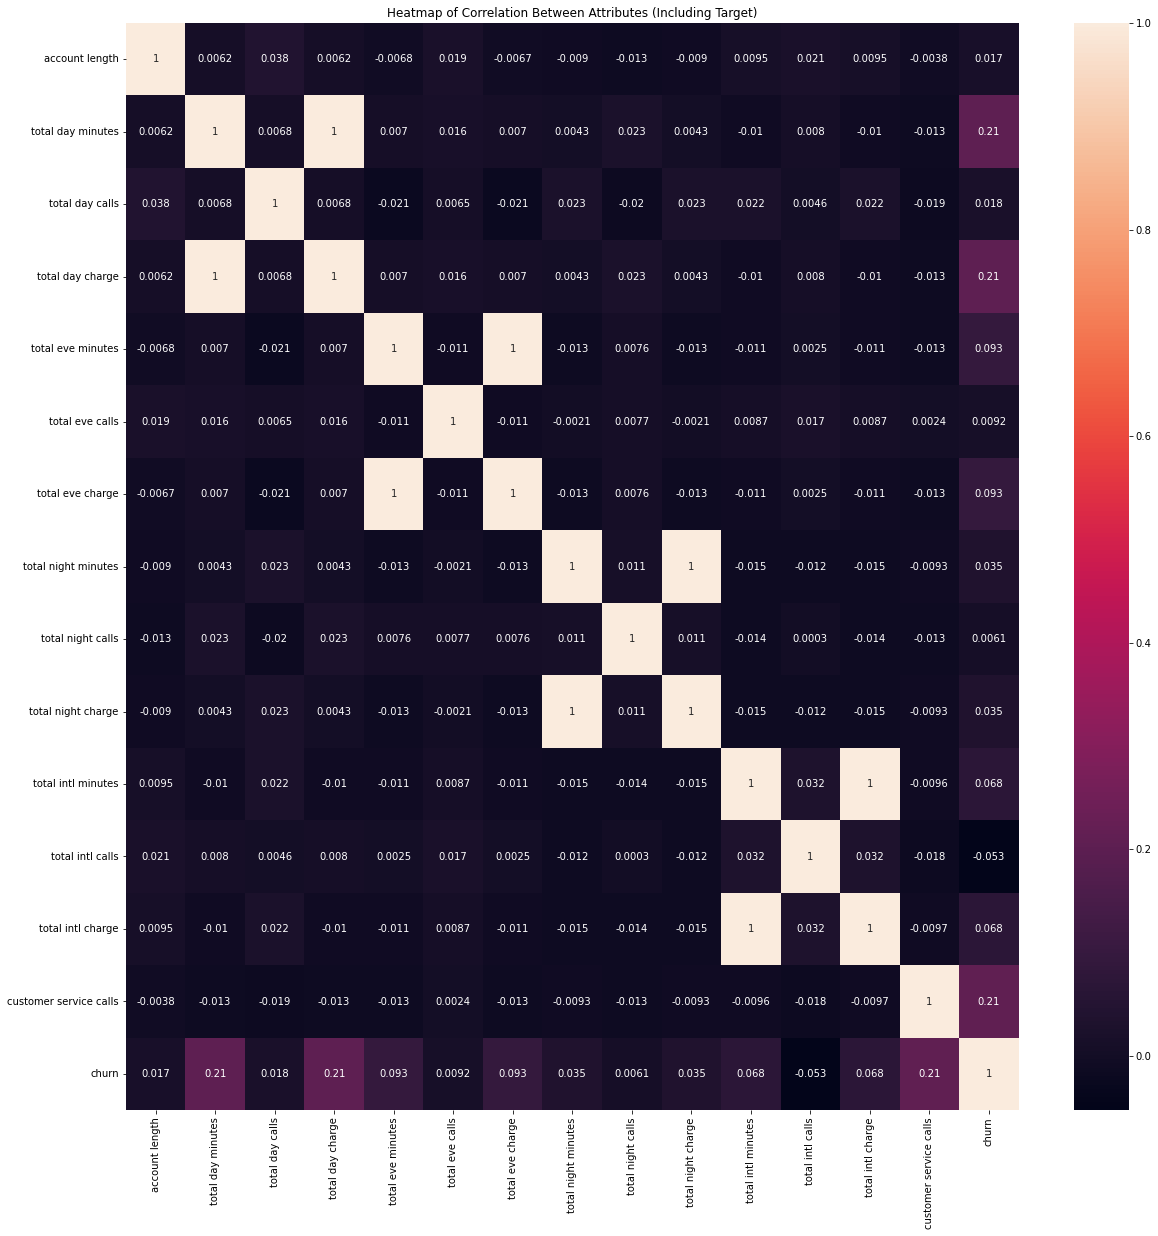

In [6]:
#create a heatmap to inspect correlation between attributes
corr_mat = df[["account length", 'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']].corr()
fig, ax = plt.subplots(figsize=(20, 20))
# plot it
sns.heatmap(corr_mat, annot = True)
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [7]:
#investigate any null values
df.isnull().values.any()

False

In [8]:
# drop unnecessary columns- not valuable for business question
df.drop(columns = ['phone number', 'area code', 'state'], axis = 1, inplace = True)

In [9]:
#one hot encoding of international plan from 'yes' and 'no' to binary
df['international plan'].replace(('yes', 'no'), (1,0), inplace=True)

In [10]:
#check that international plan column is now binary
df['international plan']

0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: international plan, Length: 3333, dtype: int64

In [11]:
#one hot encoding of voice mail plan from 'yes' and 'no' to binary
df['voice mail plan'].replace(('yes', 'no'), (1,0), inplace=True)

In [12]:
#create variable of column 'churn' from the data for readibility
churn = df['churn']

In [13]:
#inspect the churn variable for length and dtype
churn.head(100)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98     True
99     True
Name: churn, Length: 100, dtype: bool

In [14]:
#investigate value counts of false and turn churns
churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

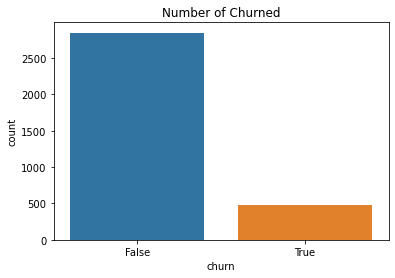

In [15]:
#visulize value counts of churned
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='churn', data=df)
plt.title("Number of Churned")
plt.show()


In [16]:
#investigate the percentage of people who churned and did not churn
n=len(df)
surv_0=len(df[df['churn']==0])
surv_1=len(df[df['churn']==1])

print("% of people who did churn from dataset: ",surv_1*100/n)
print("% of people who did not churn from dataset: ",surv_0*100/n)

% of people who did churn from dataset:  14.491449144914492
% of people who did not churn from dataset:  85.5085508550855


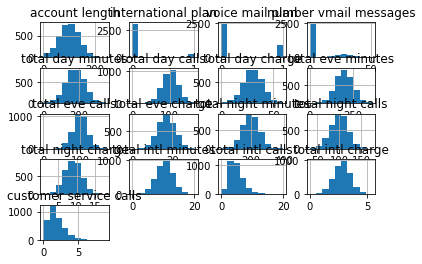

In [17]:
df.hist()
plt.show()

In [18]:
#check that voice mail plan is now binary
df['voice mail plan']

0       1
1       1
2       0
3       0
4       0
       ..
3328    1
3329    0
3330    0
3331    0
3332    1
Name: voice mail plan, Length: 3333, dtype: int64

In [19]:
print(df['total day minutes'].describe())

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: total day minutes, dtype: float64


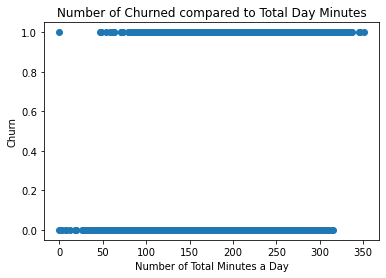

In [20]:
fig , ax = plt.subplots(figsize=(6,4))
plt.scatter(x='total day minutes', y = 'churn', data=df)
plt.title("Number of Churned compared to Total Day Minutes")
plt.xlabel("Number of Total Minutes a Day")
plt.ylabel("Churn")

plt.show()

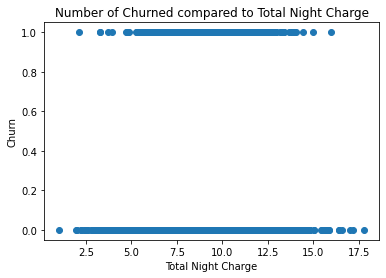

In [21]:
fig , ax = plt.subplots(figsize=(6,4))
plt.scatter(x='total night charge', y = 'churn', data=df)
plt.title("Number of Churned compared to Total Night Charge")
plt.xlabel("Total Night Charge")
plt.ylabel("Churn")

plt.show()

## Create training and test sets

In [22]:
#create training sets to start modeling and prediction upon the data
y = churn.astype(int)
X = df.drop(columns=['churn'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [23]:
#Normalize the data to prevent leakage
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)

X_test_ss = ss.transform(X_test)

## Instantiating Models

In [24]:
#instantiating models within a dictionary
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [162]:
#looking for accuracy, precision and recall scores within the models
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train_ss, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test_ss)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [163]:
#printing out accuracy, precision, and recall scores from each of those models

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
columns=['Accuracy', 'Precision', 'Recall']


modeltable = (tabulate(df_model, headers = columns, tablefmt="grid"))
print(modeltable)

plt.savefig('modeltable.png')
dfi.export(df_model, "modeltable.png")

+-------------------------+------------+-------------+----------+
|                         |   Accuracy |   Precision |   Recall |
+=========================+============+=============+==========+
| Logistic Regression     |   0.858513 |       0.192 | 0.585366 |
+-------------------------+------------+-------------+----------+
| Support Vector Machines |   0.856115 |       0.128 | 0.592593 |
+-------------------------+------------+-------------+----------+
| Decision Trees          |   0.907674 |       0.736 | 0.676471 |
+-------------------------+------------+-------------+----------+
| Random Forest           |   0.948441 |       0.688 | 0.955556 |
+-------------------------+------------+-------------+----------+
| Naive Bayes             |   0.851319 |       0.464 | 0.504348 |
+-------------------------+------------+-------------+----------+
| K-Nearest Neighbor      |   0.890887 |       0.368 | 0.793103 |
+-------------------------+------------+-------------+----------+


<Figure size 432x288 with 0 Axes>

![](modeltable.png)

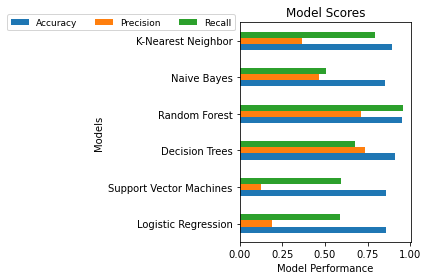

In [27]:
#Plotting the accuracy, precision and recall scores of the models
ax = df_model.plot.barh(title = 'Model Scores')
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='right',
    prop={'size': 9},
    

    
)
ax.set_xlabel('Model Performance', fontsize=10)
ax.set_ylabel('Models', fontsize='medium')
plt.tight_layout()

## Logistic Regression

In [28]:
#Print the classification report for a basic logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_ss, y_train)

y_pred = logreg.predict(X_test_ss)
print(classification_report(y_test, y_pred))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Dummy Classifier Confusion matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       709
           1       0.59      0.19      0.29       125

    accuracy                           0.86       834
   macro avg       0.73      0.58      0.61       834
weighted avg       0.83      0.86      0.83       834

Accuracy Score : 0.8585131894484412
Precision Score : 0.5853658536585366
Recall Score : 0.192
F1 Score : 0.2891566265060241
Confusion Matrix : 
[[692  17]
 [101  24]]


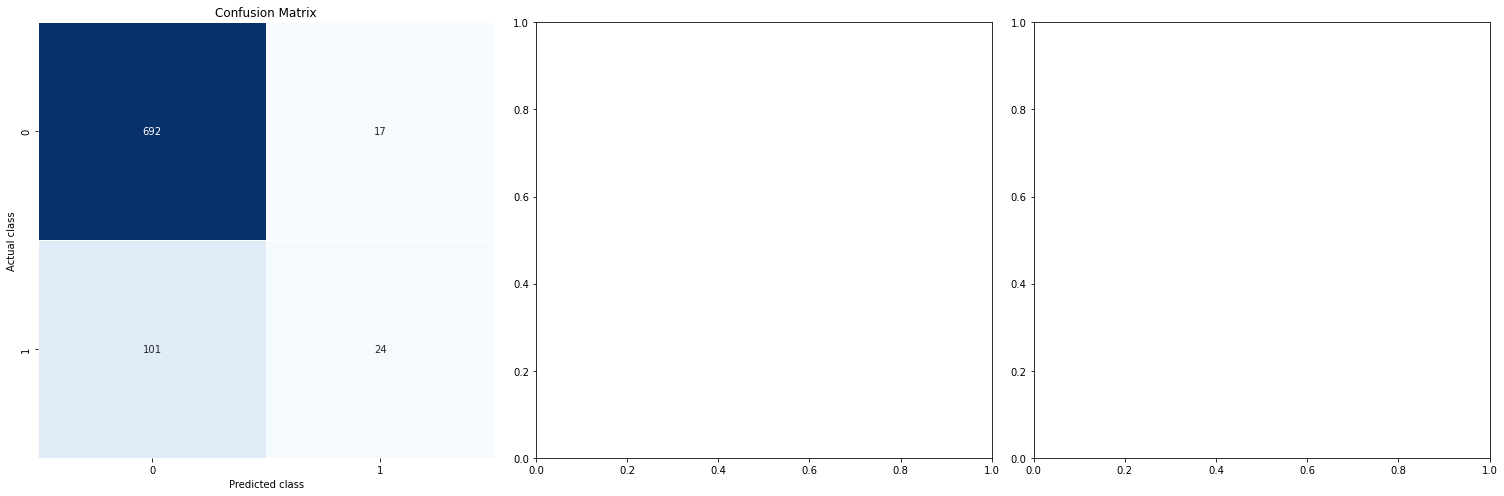

In [29]:
#create confusion matrix heatmap
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(21, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
ax1.set_title("Confusion Matrix")
ax1.set_xlabel("Predicted class")
ax1.set_ylabel("Actual class")
fig.tight_layout()


plt.show()



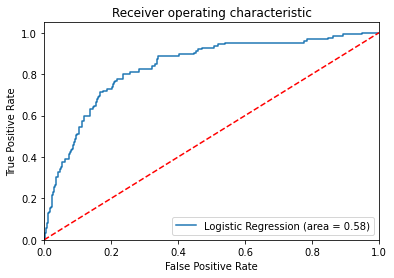

In [30]:
# ROC is a coomon tool for binary classifiers and we would want the the dotted line that represents the ROC curve of a purely random classifier to stay as far away from that line as possible. This doesn't happen here. 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_ss))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_ss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [31]:
#hypertune the model using GridSearch
param_grid_lr = ({"max_iter": [20, 50, 100, 200, 500, 1000],
                  "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                  "class_weight": ["balanced"]})
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234),scoring ="accuracy", param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(X_train_ss, y_train)
print(logModel_grid.best_estimator_)
y_pred_lr = logModel_grid.predict(X_test_ss)
print(y_pred_lr)
      
best_lr = LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234,
                   solver='newton-cg')

Fitting 10 folds for each of 30 candidates, totalling 300 fits
LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234,
                   solver='newton-cg')
[0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1
 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0
 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0

In [32]:
# fitting the best parameters to new logistic regression model 
lg_model =LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234,
                   solver='newton-cg')
lg_model.fit(X_train_ss, y_train)

LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234,
                   solver='newton-cg')

In [33]:
y_hat_lg = lg_model.predict(X_train_ss)
y_lg_model = lg_model.predict(X_test)

In [34]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat_lg))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_lg_model))

Training set accuracy:  0.7675070028011205
Test set accuracy:  0.1498800959232614


In [35]:
print(confusion_matrix(y_test, y_lg_model))

[[  0 709]
 [  0 125]]


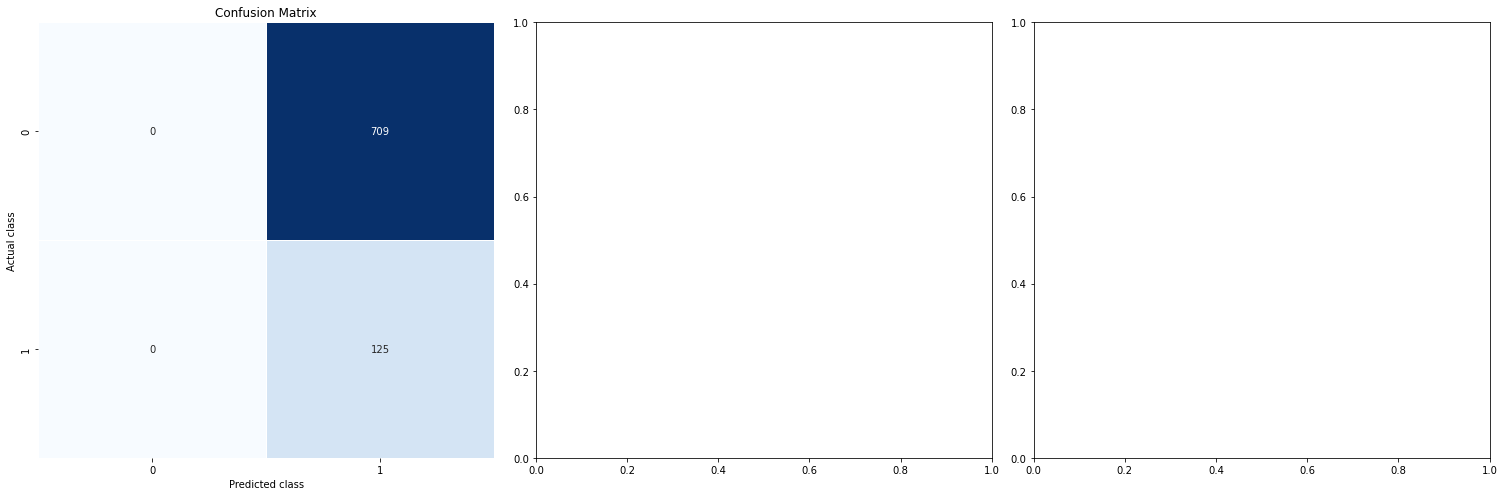

In [36]:
#Create confusion matrix heatmap with new model
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(21, 7))
cm = confusion_matrix(y_test, y_lg_model)
sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
ax1.set_title("Confusion Matrix")
ax1.set_xlabel("Predicted class")
ax1.set_ylabel("Actual class")
fig.tight_layout()


plt.show()

In [37]:
print(classification_report(y_test, y_lg_model))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       709
           1       0.15      1.00      0.26       125

    accuracy                           0.15       834
   macro avg       0.07      0.50      0.13       834
weighted avg       0.02      0.15      0.04       834



In [38]:
#cross validate scores
scores_lg = cross_val_score(logreg, X, y, cv =5)

In [39]:
print('Model accuracy: ',np.mean(scores_lg))

Model accuracy:  0.8505859682771227


This model has 85% accuracy

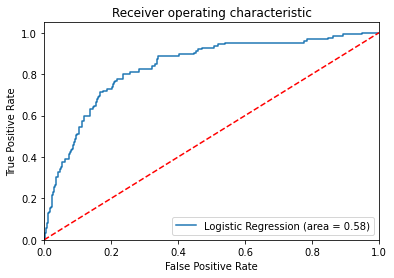

In [40]:
# Testing ROC on this model
logit_roc_auc = roc_auc_score(y_pred_lr, logreg.predict(X_test_ss))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_ss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [41]:
# Printing the accuracy, precision, recall and f1 score of hypertuned model
print(accuracy_score(y_test, y_pred_lr), ": is the accuracy score")
print(precision_score(y_test, y_pred_lr), ": is the precision score")
print(recall_score(y_test, y_pred_lr), ": is the recall score")
print(f1_score(y_test, y_pred_lr), ": is the f1 score")

0.7793764988009593 : is the accuracy score
0.3843137254901961 : is the precision score
0.784 : is the recall score
0.5157894736842106 : is the f1 score


## K Nearest Neighbors

In [42]:
#Next evaluation metris ic K nearest Neighbors
knn = KNeighborsClassifier()
#Training the model.
knn.fit(X_train_ss, y_train)

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train_ss, y_train)
#Print The value of best Hyperparameters   
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 5


In [43]:
knn = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result_knn = grid_search.fit(X_train_ss, y_train)
# summarize results
print("Best: %f using %s" % (grid_result_knn.best_score_, grid_result_knn.best_params_))


Best: 0.892758 using {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


In [44]:
# fitting the best parameters to new knn model 
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',metric = 'manhattan')
knn.fit(X_train_ss, y_train)

KNeighborsClassifier(metric='manhattan')

In [45]:
#Accuracy of the training set with the knn evaluator
y_hat = knn.predict(X_train_ss)
y_knn = knn.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.9211684673869548
Test set accuracy:  0.39568345323741005


In [46]:
#creating the confusion matrix of improved knn model
print(confusion_matrix(y_test, y_knn))

[[224 485]
 [ 19 106]]


In [47]:
#classification report of the improved knn model
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.92      0.32      0.47       709
           1       0.18      0.85      0.30       125

    accuracy                           0.40       834
   macro avg       0.55      0.58      0.38       834
weighted avg       0.81      0.40      0.44       834



In [48]:
#cross validate scores
scores = cross_val_score(knn, X, y, cv =5)
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.8817919868894382


In [49]:
#Scaling the predictive variables
preds_knn = knn.predict(X_test_ss)
probs_knn = knn.predict_proba(X_test_ss)

In [50]:
#Printing out the scores of log loss, accuracy, precision, and recall. 
print("log loss: ", log_loss(y_test, probs_knn))
print("accuracy: ", accuracy_score(y_test, preds_knn))
print("precision:", precision_score(y_test, preds_knn))
print("recall:   ", recall_score(y_test, preds_knn))

log loss:  1.0035985340534541
accuracy:  0.894484412470024
precision: 0.8936170212765957
recall:    0.336


This knn model has 89% accuracy. 

## Random Forests

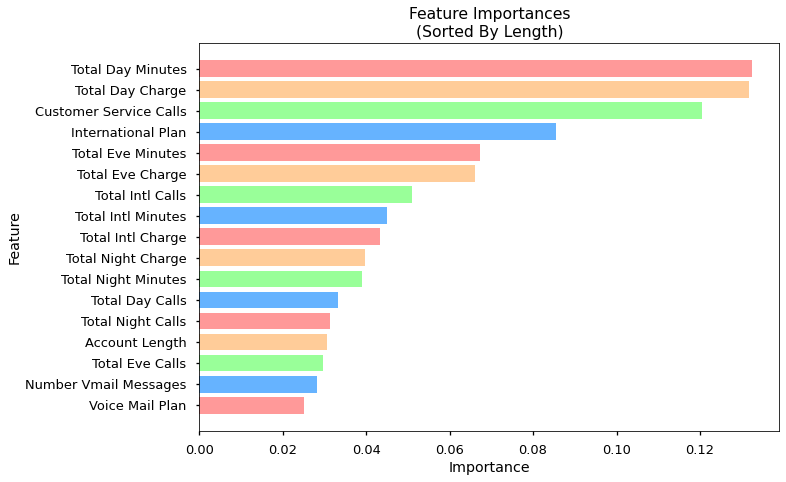

In [51]:
#plotting feature importance using random forests classifier
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
feature_importance_df = pd.DataFrame(
    forest.feature_importances_, 
    columns=['importance']
    )

# Add feature names.
feature_importance_df['feature'] = X.columns

# For vanity...
feature_importance_df['feature'] = (
    feature_importance_df['feature']
    .apply(str.title)
    )

# Sort the data!
feature_importance_df.sort_values('importance', inplace=True)
feature_importance_df

# Plot feature importances.
with plt.style.context(['seaborn-talk']):
    fig, ax = plt.subplots()
    ax.barh(
        y=feature_importance_df['feature'],
        width=feature_importance_df['importance'],
        color = ['#ff9999','#66b3ff','#99ff99','#ffcc99'],
        )
    ax.set(
        title='Feature Importances\n(Sorted By Length)',
        xlabel='Importance',
        ylabel='Feature'
        )

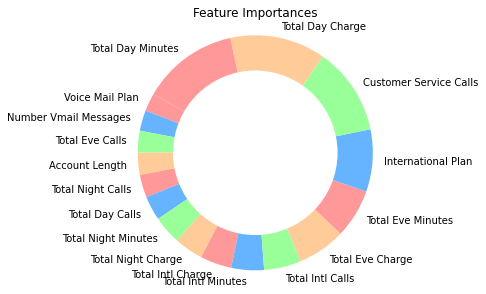

In [52]:
labels = feature_importance_df['feature']
sizes = feature_importance_df['importance']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()


plt.pie(sizes, colors = colors, labels=labels, startangle=150, pctdistance=0.100)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()
plt.title('Feature Importances')
plt.show()

In [53]:
#gridsearch for best parameters in random forest
rf = RandomForestClassifier()   
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
max_features = ['auto', 'sqrt']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
min_samples_split = [2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
grid_result_rf = rf_random.fit(X_train_ss, y_train)
# summarize results
print("Best: %f using %s" % (grid_result_rf.best_score_, grid_result_rf.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best: 0.955582 using {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': False}


In [54]:
# fitting the best parameters to new rf model 
rf = RandomForestClassifier(n_estimators= 800, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 60, bootstrap= False)
rf.fit(X_train_ss, y_train)

RandomForestClassifier(bootstrap=False, max_depth=60, max_features='sqrt',
                       min_samples_split=5, n_estimators=800)

In [55]:
y_test_pred = grid_result_rf.predict(X_test_ss)

In [56]:
(y_test_pred == 0).sum()

737

In [57]:
print('Training set accuracy: ', metrics.accuracy_score(y_test, y_test_pred))

Training set accuracy:  0.947242206235012


In [58]:
#Accuracy of the training set with the rf evaluator
y_hat_rf = rf.predict(X_train_ss)
y_rf = rf.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat_rf))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_rf))

Training set accuracy:  1.0
Test set accuracy:  0.39448441247002397


In [59]:
#creating the confusion matrix of improved rf model
print(confusion_matrix(y_test, y_rf))

[[224 485]
 [ 20 105]]


In [60]:
#classification report of the improved rf model
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.92      0.32      0.47       709
           1       0.18      0.84      0.29       125

    accuracy                           0.39       834
   macro avg       0.55      0.58      0.38       834
weighted avg       0.81      0.39      0.44       834



In [61]:
#cross validate scores
scores_rf = cross_val_score(rf, X, y, cv =5)
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.8817919868894382


In [62]:
#Scaling the predictive variables
preds_rf = rf.predict(X_test_ss)
probs_rf = rf.predict_proba(X_test_ss)

In [65]:
#Printing out the scores of log loss, accuracy, precision, and recall. 
print("log loss: ", log_loss(y_test, probs_rf))
print("accuracy: ", accuracy_score(y_test, preds_rf))
print("precision:", precision_score(y_test, preds_rf))
print("recall:   ", recall_score(y_test, preds_rf))

log loss:  0.1705432818020765
accuracy:  0.9496402877697842
precision: 0.9278350515463918
recall:    0.72


In [66]:
print(confusion_matrix(y_test, preds_rf))

[[702   7]
 [ 35  90]]


In [109]:
models_tuned = {}

# Logistic Regression
models_tuned['Logistic Regression'] = LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234,
                   solver='newton-cg')

# Random Forest
models_tuned['Random Forest'] = RandomForestClassifier(n_estimators= 600, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 60, bootstrap= False)


# K-Nearest Neighbors
models_tuned['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',metric = 'manhattan')

In [172]:
#looking for accuracy, precision and recall scores within the models
accuracy, precision, recall = {}, {}, {}

for keys in models_tuned.keys():
    
    # Fit the classifier
    models_tuned[keys].fit(X_train_ss, y_train)
    
    # Make predictions
    predictions = models_tuned[keys].predict(X_test_ss)
    
    # Calculate metrics
    accuracy[keys] = accuracy_score(predictions, y_test)
    precision[keys] = precision_score(predictions, y_test)
    recall[keys] = recall_score(predictions, y_test)
    

In [176]:
#printing out accuracy, precision, and recall scores from each of those models

df_model_tuned = pd.DataFrame(index=models_tuned.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model_tuned['Accuracy'] = accuracy.values()

columns=['Accuracy', 'Precision', 'Recall']


hypertuned_models = (tabulate(df_model_tuned, headers = columns, tablefmt = 'grid'))
print(hypertuned_models)

plt.savefig('hypertuned_models.png')
import dataframe_image as dfi
dfi.export(df_model_tuned, "hypertuned_models.png")



+---------------------+------------+-------------+----------+
|                     |   Accuracy |   Precision |   Recall |
+=====================+============+=============+==========+
| Logistic Regression |   0.779376 |         nan |      nan |
+---------------------+------------+-------------+----------+
| Random Forest       |   0.950839 |         nan |      nan |
+---------------------+------------+-------------+----------+
| K-Nearest Neighbor  |   0.894484 |         nan |      nan |
+---------------------+------------+-------------+----------+


<Figure size 432x288 with 0 Axes>

In [217]:
from pandas.plotting import table 
import dataframe_image as dfi

df_model_tuned = pd.DataFrame(index=models_tuned.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model_tuned['Accuracy'] = accuracy.values()
df_model_tuned['Precision'] = precision.values()
df_model_tuned['Recall'] = recall.values()

columns=['Accuracy', ' Precision', 'Recall']


hypertuned_models = (tabulate(df_model_tuned, headers = columns, tablefmt="grid"))
print(hypertuned_models)

plt.savefig('hypertuned_models.png')
dfi.export(df_model_tuned, "hypertuned_models.png")

+---------------------+------------+--------------+----------+
|                     |   Accuracy |    Precision |   Recall |
+=====================+============+==============+==========+
| Logistic Regression |   0.779376 |        0.784 | 0.384314 |
+---------------------+------------+--------------+----------+
| Random Forest       |   0.950839 |        0.728 | 0.928571 |
+---------------------+------------+--------------+----------+
| K-Nearest Neighbor  |   0.894484 |        0.336 | 0.893617 |
+---------------------+------------+--------------+----------+


<Figure size 432x288 with 0 Axes>

In [214]:
df_model_tuned.dfi.export("df_model_tuned.png")
hypertuned_models.export_png('hypertuned_models.png')


                     
plt.savefig('hypertuned_models.png')
dfi.export(df_model_tuned, "hypertuned_models.png")


AttributeError: 'str' object has no attribute 'export_png'

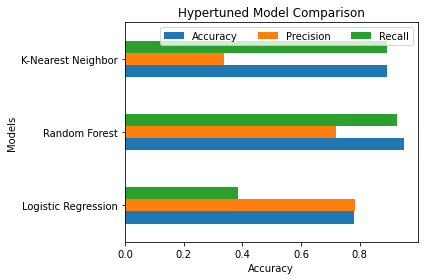

In [147]:
#Plotting the accuracy, precision and recall scores of the models
ax = df_model_tuned.plot.barh()
ax.set_title('Hypertuned Model Comparison')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Models')
ax.legend(
    ncol=len(models_tuned.keys()), 
    
)
plt.tight_layout()

## Creating New Data to Evaluate Models

In [178]:
df.head()
print(df["total day minutes"].std())
df_new = df.copy()
df_new["total day minutes"] = df_new["total day minutes"] - 27

df_new["total day minutes"].mean()

54.46738920237142


152.7750975097509

In [179]:
df_new.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,238.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,0,1,26,134.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,0,0,216.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,1,0,0,272.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,1,0,0,139.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [180]:
#create training sets to start modeling and prediction upon the data
y = churn.astype(int)
X = df_new.drop(columns=['churn', 'total day charge'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
#Normalize the data to prevent leakage
ss = StandardScaler()
X_train_new = ss.fit_transform(X_train)

X_test_new = ss.transform(X_test)

In [181]:
df_new["total day minutes"] = 30  

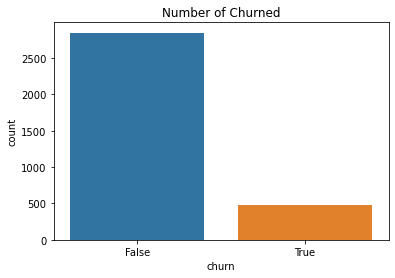

In [200]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='churn', data=df_new)
plt.title("Number of Churned")
plt.show()


In [182]:
df.head()
print(df["total day minutes"].std())
df_new = df.copy()
df_new["total day minutes"] = df_new["total day minutes"] - 27

54.46738920237142


In [183]:
df_new["total day minutes"].mean()

152.7750975097509

In [184]:
X_test.mean()

account length            102.705036
international plan          0.097122
voice mail plan             0.290168
number vmail messages       8.438849
total day minutes         152.083573
total day calls           100.425659
total eve minutes         201.305396
total eve calls           100.621103
total eve charge           17.111103
total night minutes       201.624101
total night calls         100.719424
total night charge          9.073297
total intl minutes         10.176259
total intl calls            4.576739
total intl charge           2.748094
customer service calls      1.545564
dtype: float64

In [185]:
grid_result_rf_new = rf_random.fit(X_train_new, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [199]:
#(y_test_pred_new_2 == 0).sum()

In [188]:
#create training sets to start modeling and prediction upon the data
y = churn.astype(int)
X = df_new.drop(columns=['churn'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
#Normalize the data to prevent leakage
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)

X_test_ss = ss.transform(X_test)


In [189]:
y_test_pred_new_2 = grid_result_rf_new.predict(X_test_new)

In [190]:
#Normalize the data to prevent leakage
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)

X_test_ss = ss.transform(X_test)


In [191]:
y_predict_new = rf.predict(X_train_ss)

In [192]:
n=len(df)
surv_0=len(df_new[df_new['churn']==0])
surv_1=len(df_new[df_new['churn']==1])

print("% of people who did churn from dataset: ",surv_1*100/n)
print("% of people who did not churn from dataset: ",surv_0*100/n)

% of people who did churn from dataset:  14.491449144914492
% of people who did not churn from dataset:  85.5085508550855


In [193]:
#creating dataframe with a std less total day minutes
df.head()
print(df["total day minutes"].std())
df_new_1std = df.copy()
df_new_1std["total day minutes"] = df_new["total day minutes"] - 54

54.46738920237142


In [194]:
#create training sets to start modeling and prediction upon the data
y = churn.astype(int)
X = df_new_1std.drop(columns=['churn'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [195]:
#Normalize the data to prevent leakage
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)

X_test_ss = ss.transform(X_test)

In [196]:
y_predict_new_1std = rf.predict(X_train_ss)

In [197]:
preds_rf = y_predict_new_1std(X_test_ss)
probs_rf = y_predict_new_1std(X_test_ss)

TypeError: 'numpy.ndarray' object is not callable

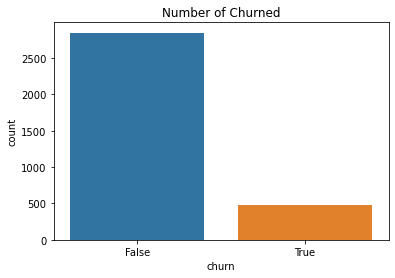

In [198]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='churn', data=df_new_1std)
plt.title("Number of Churned")
plt.show()

# Final Results

When finding a model to predict the amount of churning of customers from SyriaTel, we found that Random Forest was performing the best in accuracy overall.

In order to use the best hyperparameters we utilized a gridsearch for three of the evaulation models in the dictionary of evaulation metrics first used against the data.

We were not able to increase the performance of our models by too high of a percentage because the base models were already quite high. However, by using these hyperparameters chosen by gridsearch: n_estimators= 600, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 60, bootstrap= False the final random forest model had 89% accuracy, 89% precision and 34% recall. 